Vamos explorar dados de crédito presentes neste neste link. Os dados estão no formato CSV e contém informações sobre clientes de uma fintech. Em especial, estamos interessados em averiguar o perfil de consumo dos clientes para que a equipe de marketing possa criar estratégias com cashbacks de forma personalizada de acordo com perfil de consumo.

# Análise Perfil de Consumo


In [ ]:
#importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import matplotlib.pyplot as plt

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| tipo_cartao | Categoria do cartao: standart ou platinium |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_m | Soma total do valor das transações no cartão de crédito nos ultimos 3 meses |
| qtd_transacoes| Quantidade total de transações no cartão nos últimos 3 meses|
| cp_mercado| Valor das transações em supermercado e afins|
| cp_lazer| Valor das transações em restaurantes, bares e cinemas|
| cp_servicos| Valor das transações em lojas de servicos, assinaturas de tv e afins|
| cp_saude| Valor das transações em farmácias, clinicas e afins|
| cp_vestuario| Valor das transações lojas de departamentos,roupas e acessórios|
| cp_casa| Valor das transações em lojas de materiais de construção, home centers e afins|

In [ ]:
#fazendo a leitura do arquivo e criando um dataframe para o nosso trabalho
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSGf8ui4vEWIk6XUwBkJLaZ0z505o3nC7ozBQmi9Bc4NbDxon15HUEVjZbHSbJemLqdb4GUG_2N52Ne/pub?gid=1806610395&single=true&output=csv')

In [ ]:
#explorando os dados
df.head()

,id,idade,sexo,dependentes,escolaridade,estado_civil,limite_credito,tipo_cartao,valor_transacoes,qtd_transacoes,cp_mercado,cp_lazer,cp_servicos,cp_saude,cp_vestuario,cp_casa
0,768805383,45,M,3,ensino medio,casado,"12691,51",platinum,"1144,9",42,"343,47","515,205","114,49",0,"171,735",0
1,818770008,49,F,5,mestrado,solteiro,"8256,96",platinum,"1291,45",33,"710,2975","193,7175",0,"193,7175","193,7175",0
2,713982108,51,M,3,mestrado,casado,"3418,56",standart,"1887,72",20,"1321,404","94,386","188,772",0,0,"283,158"
3,769911858,40,F,4,ensino medio,na,"3313,03",standart,"1171,56",20,"351,468","527,202","292,89",0,0,0
4,709106358,40,M,3,sem educacao formal,casado,"4716,22",standart,"816,08",28,"244,824","285,628","130,5728","32,6432","122,412",0


In [ ]:
df.dtypes

id                   int64
idade                int64
sexo                object
dependentes          int64
escolaridade        object
estado_civil        object
limite_credito      object
tipo_cartao         object
valor_transacoes    object
qtd_transacoes       int64
cp_mercado          object
cp_lazer            object
cp_servicos         object
cp_saude            object
cp_vestuario        object
cp_casa             object
dtype: object

Conseguimos verificar que algumas váriaveis possuem dados do tipo object/string(texto) e que deveriam estar no formato float(numéricos). Iremos realizar o tratamento desses dados.

In [ ]:
#verificando dados ausentes
df.isnull().sum()

id                  0
idade               0
sexo                0
dependentes         0
escolaridade        0
estado_civil        0
limite_credito      0
tipo_cartao         0
valor_transacoes    0
qtd_transacoes      0
cp_mercado          0
cp_lazer            0
cp_servicos         0
cp_saude            0
cp_vestuario        0
cp_casa             0
dtype: int64

**Tratando dados**

In [ ]:
#alterando a (,) como separador de numeros para (.)
df = df.replace({',': '.'}, regex=True)
#transformandos os dados 'objects' em 'floats'
df.limite_credito=df.limite_credito.astype(float, copy=False)
df.valor_transacoes=df.valor_transacoes.astype(float, copy=False)
df.cp_mercado=df.cp_mercado.astype(float, copy=False)
df.cp_lazer=df.cp_lazer.astype(float, copy=False)
df.cp_servicos=df.cp_servicos.astype(float, copy=False)
df.cp_saude =df.cp_saude .astype(float, copy=False)
df.cp_vestuario=df.cp_vestuario.astype(float, copy=False)
df.cp_casa=df.cp_casa.astype(float, copy=False)

In [ ]:
df.dtypes

id                    int64
idade                 int64
sexo                 object
dependentes           int64
escolaridade         object
estado_civil         object
limite_credito      float64
tipo_cartao          object
valor_transacoes    float64
qtd_transacoes        int64
cp_mercado          float64
cp_lazer            float64
cp_servicos         float64
cp_saude            float64
cp_vestuario        float64
cp_casa             float64
dtype: object

In [ ]:
df.head()

,id,idade,sexo,dependentes,escolaridade,estado_civil,limite_credito,tipo_cartao,valor_transacoes,qtd_transacoes,cp_mercado,cp_lazer,cp_servicos,cp_saude,cp_vestuario,cp_casa
0,768805383,45,M,3,ensino medio,casado,12691.51,platinum,1144.90,42,343.4700,515.2050,114.4900,0.0000,171.7350,0.000
1,818770008,49,F,5,mestrado,solteiro,8256.96,platinum,1291.45,33,710.2975,193.7175,0.0000,193.7175,193.7175,0.000
2,713982108,51,M,3,mestrado,casado,3418.56,standart,1887.72,20,1321.4040,94.3860,188.7720,0.0000,0.0000,283.158
3,769911858,40,F,4,ensino medio,na,3313.03,standart,1171.56,20,351.4680,527.2020,292.8900,0.0000,0.0000,0.000
4,709106358,40,M,3,sem educacao formal,casado,4716.22,standart,816.08,28,244.8240,285.6280,130.5728,32.6432,122.4120,0.000


In [ ]:
#limitando para duas casas decimais e desabilitando a notação cientifica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
df.head()

,id,idade,sexo,dependentes,escolaridade,estado_civil,limite_credito,tipo_cartao,valor_transacoes,qtd_transacoes,cp_mercado,cp_lazer,cp_servicos,cp_saude,cp_vestuario,cp_casa
0,768805383,45,M,3,ensino medio,casado,12691.51,platinum,1144.90,42,343.47,515.21,114.49,0.00,171.74,0.00
1,818770008,49,F,5,mestrado,solteiro,8256.96,platinum,1291.45,33,710.30,193.72,0.00,193.72,193.72,0.00
2,713982108,51,M,3,mestrado,casado,3418.56,standart,1887.72,20,1321.40,94.39,188.77,0.00,0.00,283.16
3,769911858,40,F,4,ensino medio,na,3313.03,standart,1171.56,20,351.47,527.20,292.89,0.00,0.00,0.00
4,709106358,40,M,3,sem educacao formal,casado,4716.22,standart,816.08,28,244.82,285.63,130.57,32.64,122.41,0.00


**Analisando os dados para averiguar o perfil de consumo**

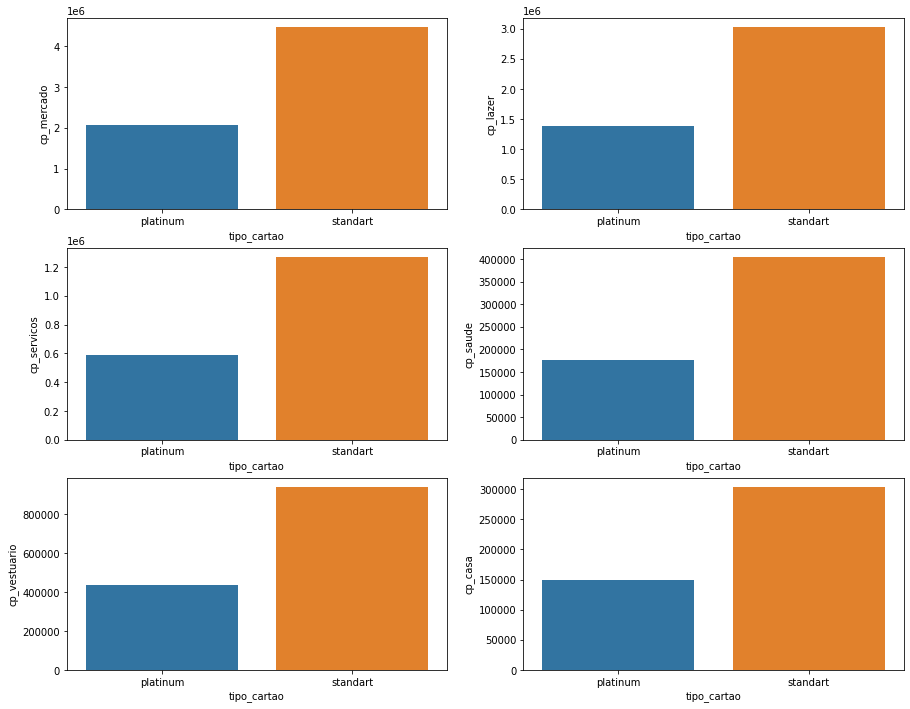

In [ ]:
plt.rc('figure', figsize=(15, 12))
fig, axes = plt.subplots(3, 2)


sns.barplot(ax = axes[0, 0], x='tipo_cartao', y='cp_mercado', data=df,estimator=sum, ci=None)
sns.barplot(ax = axes[0, 1], x='tipo_cartao', y='cp_lazer', data=df,estimator=sum,ci=None)
sns.barplot(ax = axes[1, 0], x='tipo_cartao', y='cp_servicos', data=df,estimator=sum,ci=None)
sns.barplot(ax = axes[1, 1], x='tipo_cartao', y='cp_saude', data=df,estimator=sum,ci=None)
sns.barplot(ax = axes[2, 0], x='tipo_cartao', y='cp_vestuario', data=df,estimator=sum,ci=None)
sns.barplot(ax = axes[2, 1], x='tipo_cartao', y='cp_casa', data=df,estimator=sum, ci = None)


Em uma análise breve é possivel verificar que o maior volume de transações está concentrada em 3 grupos que são:
Gastos com supermercados e afins;
Gastos com lazer;
Gastos com serviços.

In [ ]:
df.groupby('tipo_cartao')['cp_mercado', 'cp_lazer','cp_servicos'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cp_mercado,cp_lazer,cp_servicos
tipo_cartao,,,
platinum,2064135.55,1381755.21,587392.05
standart,4477847.89,3034001.38,1270426.26


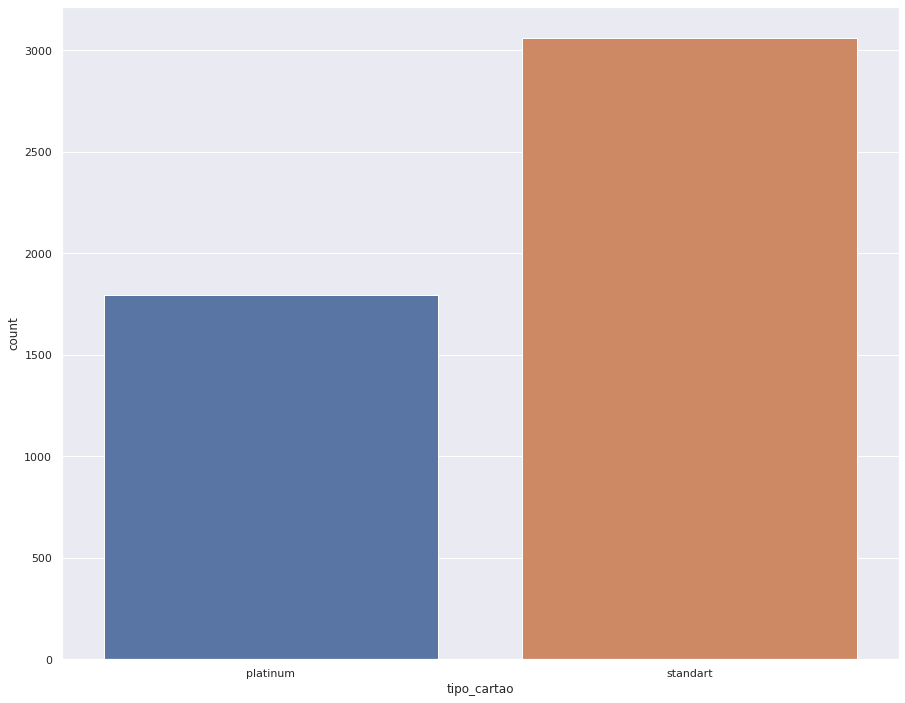

In [ ]:
sns.countplot(x='tipo_cartao', data=df)

Verificamos que o numero de clientes 'standart' é quase o dobro do numero de clientes 'platinum'. O maior gerador de receitas são os clientes standart.

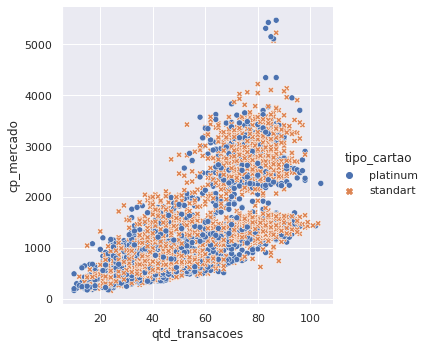

In [ ]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=df,
    x="qtd_transacoes", y="cp_mercado",
    hue="tipo_cartao", style="tipo_cartao"
)

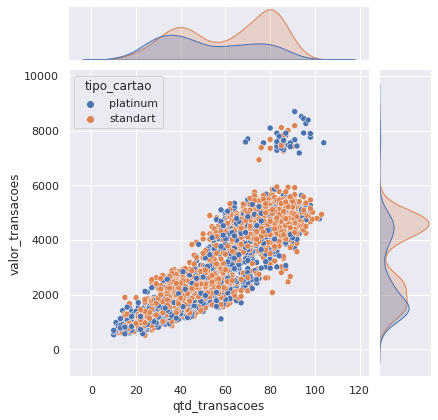

In [ ]:
sns.jointplot(data=df, x="qtd_transacoes", y="valor_transacoes", hue="tipo_cartao")

Para o grupo de clientes standart possuem o valor de transações até R$6.000,00, com concentração maior entre R$ 4.000,00 e R$ 6.000,00.

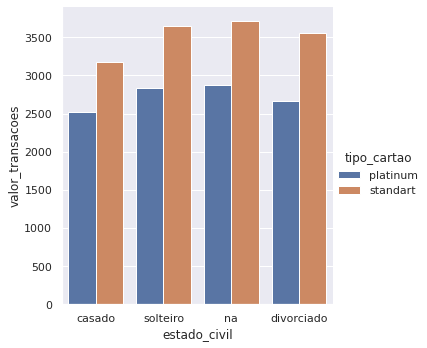

In [ ]:
sns.catplot(x="estado_civil", y="valor_transacoes", hue="tipo_cartao", kind="bar", data=df, ci = None)

In [ ]:
df.groupby('estado_civil')['id'].count()

estado_civil
casado        2470
divorciado     333
na             331
solteiro      1721
Name: id, dtype: int64

Um dado importante é que os clienes 'CASADOS' representam 50% de toda a nossa base dados. Porém o volume de transações se concentra nas outras categorias.

In [ ]:
def plota_barra(dataframe,coluna_x,coluna_y,marcador):
  sns.catplot(x=coluna_x, y=coluna_y, hue=marcador, kind="bar", data=dataframe)
  return None

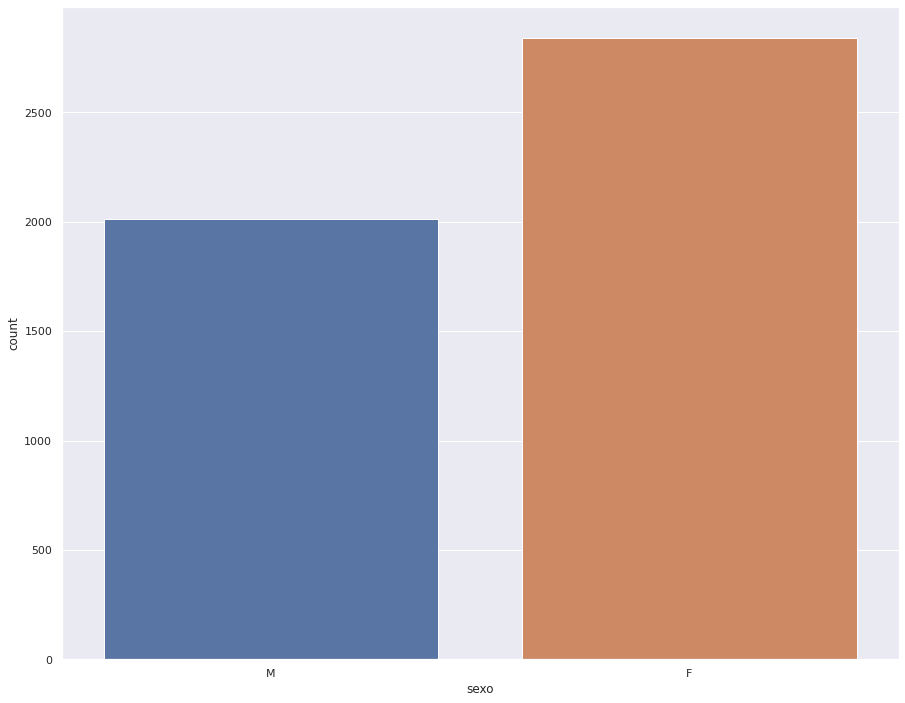

In [ ]:
sns.countplot(x='sexo', data=df)

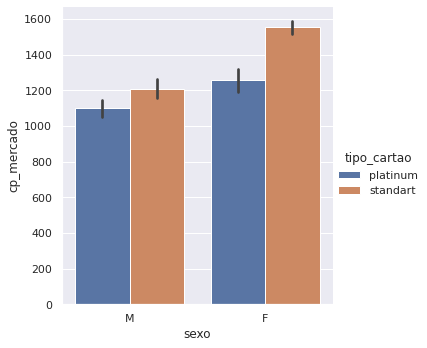

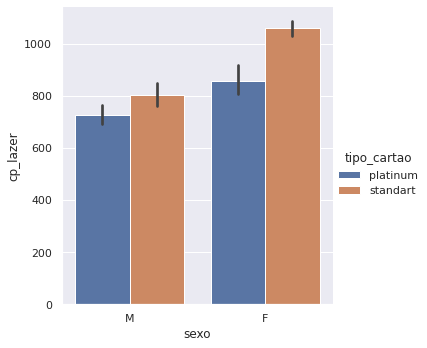

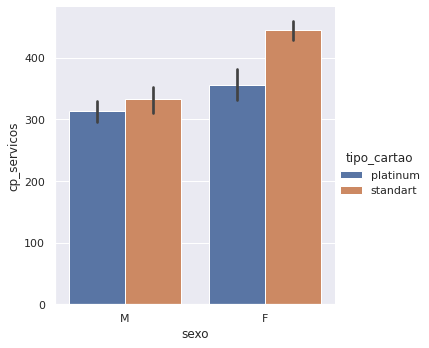

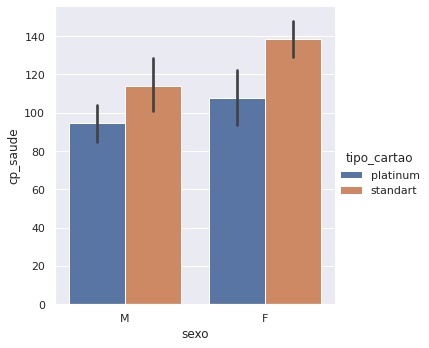

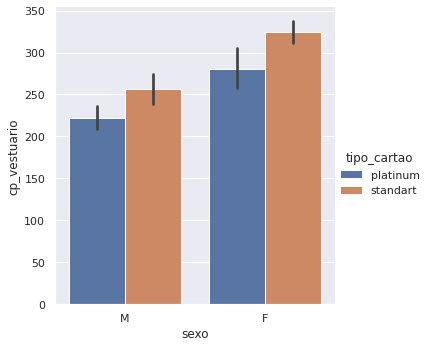

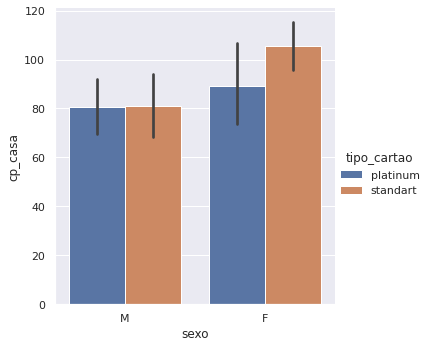

In [ ]:
plota_barra(df,'sexo','cp_mercado','tipo_cartao')
plota_barra(df,'sexo','cp_lazer','tipo_cartao')
plota_barra(df,'sexo','cp_servicos','tipo_cartao')
plota_barra(df,'sexo','cp_saude','tipo_cartao')
plota_barra(df,'sexo','cp_vestuario','tipo_cartao')
plota_barra(df,'sexo','cp_casa','tipo_cartao')

Nossa análise e insight final é que os esforços sejam direcionados para  o público feminino não casada. Pois são o público com maior participação no volume de transações. O setor que mais gera transações dentro de nossa base é o setor de 'mercado' seguido do setor de lazer.

Se o objetivo da equipe de marketing é aumentar o volume de transações dos públicos que menos utilizam o cartão, os esfoços devem ser direcionados para o público masculino casado.